<a href="https://colab.research.google.com/github/Samarulafshan/-OIBSIP/blob/main/Predicting_House_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Predicting House Prices with Linear Regression**

In [ ]:
#Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Load and Explore the Data
df=pd.read_csv(r"Housing.csv")

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
df.nunique()

price               219
area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
dtype: int64

In [ ]:
df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
# Price Distribution Analysis
lower_quant=df['price'].quantile(0.25)
high_quant=df['price'].quantile(0.75)
IQR=high_quant-lower_quant
print(IQR)
lower_bound=lower_quant-(1.5*IQR)
upper_bound=high_quant+(1.5*IQR)
print(lower_bound, upper_bound)

2310000.0
-35000.0 9205000.0


In [ ]:
out=df[(df['price']<lower_bound) | (df['price']>upper_bound)]
out

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [ ]:
lower_quant=df['area'].quantile(0.25)
high_quant=df['area'].quantile(0.75)
IQR=high_quant-lower_quant
print(IQR)
lower_bound=lower_quant-(1.5*IQR)
upper_bound=high_quant+(1.5*IQR)
print(lower_bound, upper_bound)

2760.0
-540.0 10500.0


In [ ]:
df[(df['area']<lower_bound) | (df['area']>upper_bound)]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
10,9800000,13200,3,1,2,yes,no,yes,no,yes,2,yes,furnished
56,7343000,11440,4,1,2,yes,no,yes,no,no,1,yes,semi-furnished
64,7000000,11175,3,1,1,yes,no,yes,no,yes,1,yes,furnished
66,6930000,13200,2,1,1,yes,no,yes,yes,no,1,no,furnished
69,6790000,12090,4,2,2,yes,no,no,no,no,2,yes,furnished
125,5943000,15600,3,1,1,yes,no,no,no,yes,2,no,semi-furnished
129,5873000,11460,3,1,3,yes,no,no,no,no,2,yes,semi-furnished
186,5110000,11410,2,1,2,yes,no,no,no,no,0,yes,furnished
191,5040000,10700,3,1,2,yes,yes,yes,no,no,0,no,semi-furnished


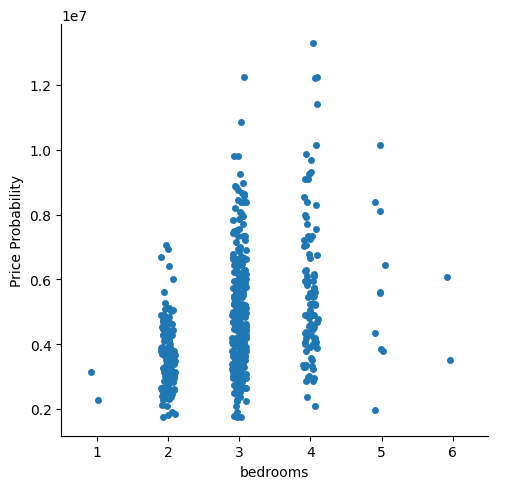

In [ ]:
sns.catplot(x='bedrooms', y='price', data=df).set_ylabels('Price Probability')

In [ ]:
from scipy.stats import skew


In [ ]:
skewness=skew(df['price'])
skewness

1.2088998457878217

<Axes: ylabel='price'>

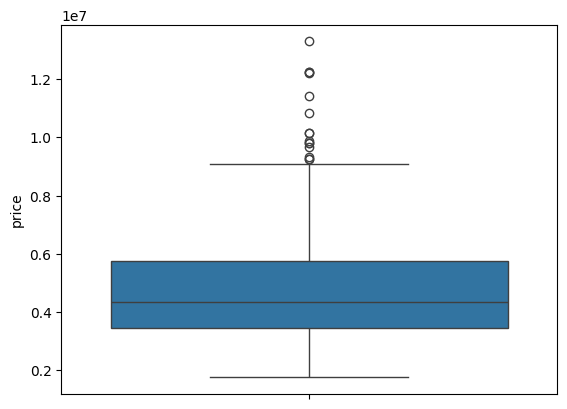

In [ ]:
sns.boxplot(df['price'])

<Axes: ylabel='area'>

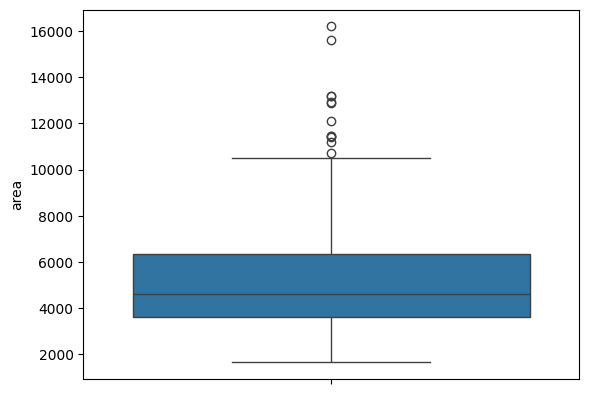

In [ ]:
sns.boxplot(df['area'])

<Axes: ylabel='bedrooms'>

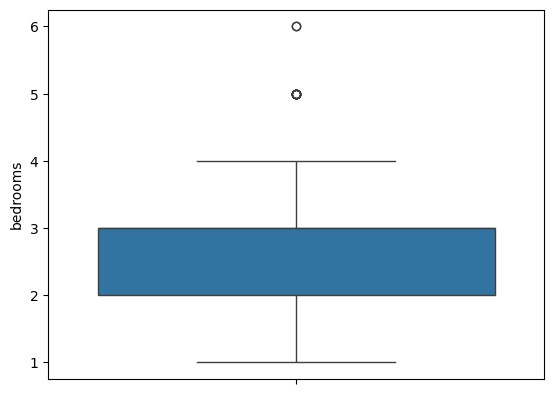

In [ ]:
sns.boxplot(df['bedrooms'])

In [ ]:
df=df[(df['price']>lower_bound) | (df['price']<upper_bound)]
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
df.shape

(545, 13)

<Axes: xlabel='area', ylabel='price'>

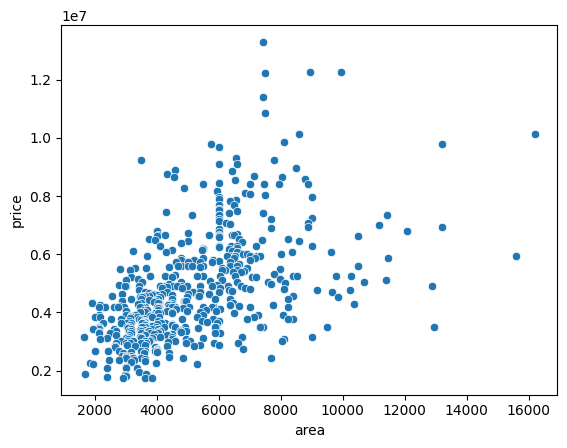

In [ ]:
sns.scatterplot(data=df, x='area', y='price')

<Axes: xlabel='area', ylabel='price'>

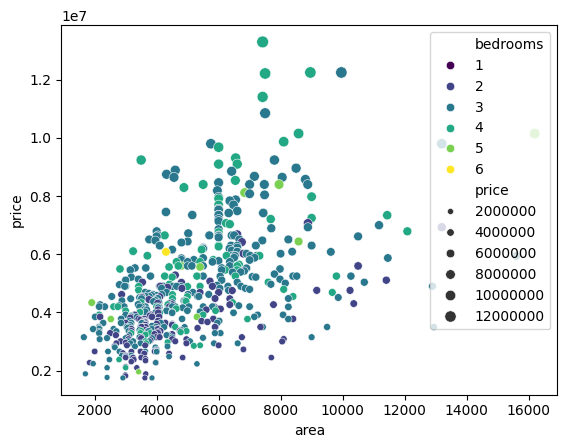

In [ ]:
sns.scatterplot(data=df, x='area', y='price', hue='bedrooms', palette='viridis', size='price')

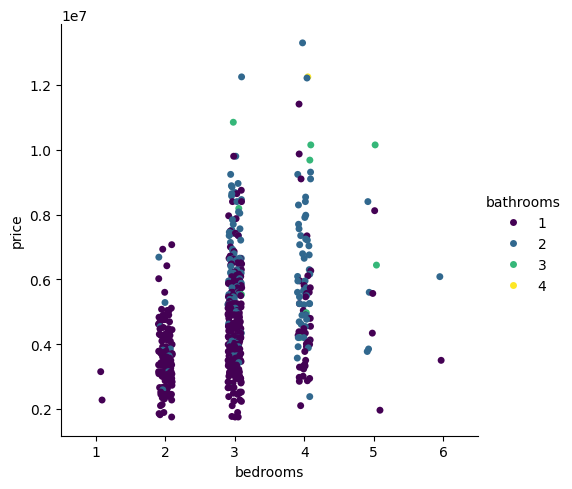

In [ ]:
sns.catplot(data=df, x='bedrooms', y='price', hue='bathrooms', palette='viridis')

In [ ]:
df[df['bedrooms']==6]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
112,6083000,4300,6,2,2,yes,no,no,no,no,0,no,furnished
395,3500000,3600,6,1,2,yes,no,no,no,no,1,no,unfurnished


<Axes: xlabel='area', ylabel='price'>

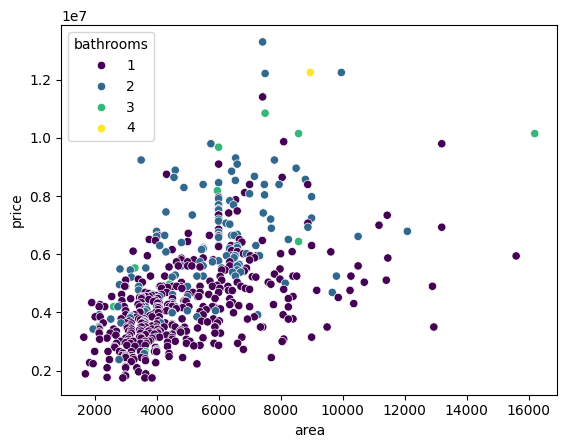

In [ ]:
sns.scatterplot(data=df, x='area', y='price', hue='bathrooms', palette='viridis')

In [ ]:
df[df['bathrooms']==4]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished


<Axes: xlabel='area', ylabel='price'>

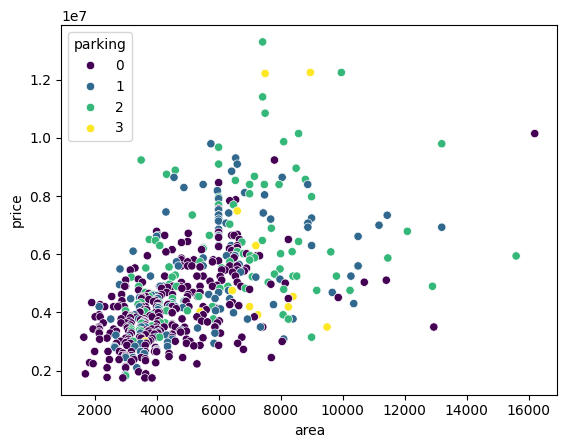

In [ ]:
sns.scatterplot(data=df, x='area', y='price', hue='parking', palette='viridis')

<Axes: xlabel='area', ylabel='price'>

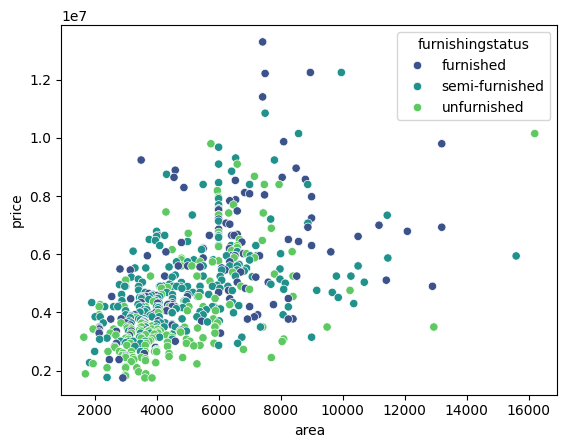

In [ ]:
sns.scatterplot(data=df, x='area', y='price', hue='furnishingstatus', palette='viridis')


<Axes: xlabel='area', ylabel='price'>

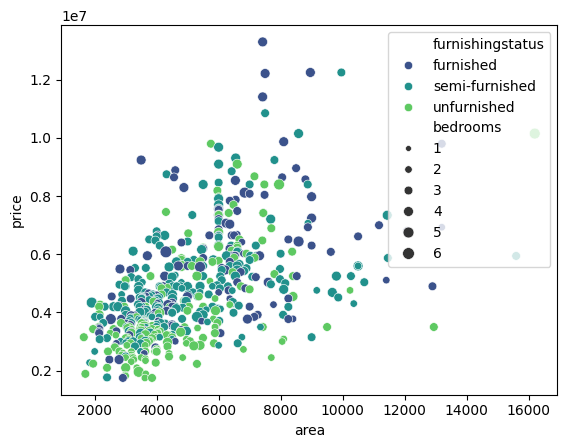

In [ ]:
sns.scatterplot(data=df, x='area', y='price', hue='furnishingstatus', palette='viridis', size='bedrooms')

<Axes: xlabel='bedrooms', ylabel='count'>

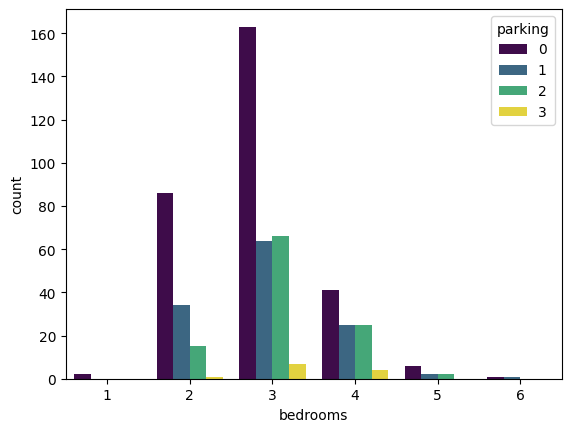

In [ ]:
sns.countplot(data=df, x='bedrooms', hue='parking', palette='viridis')

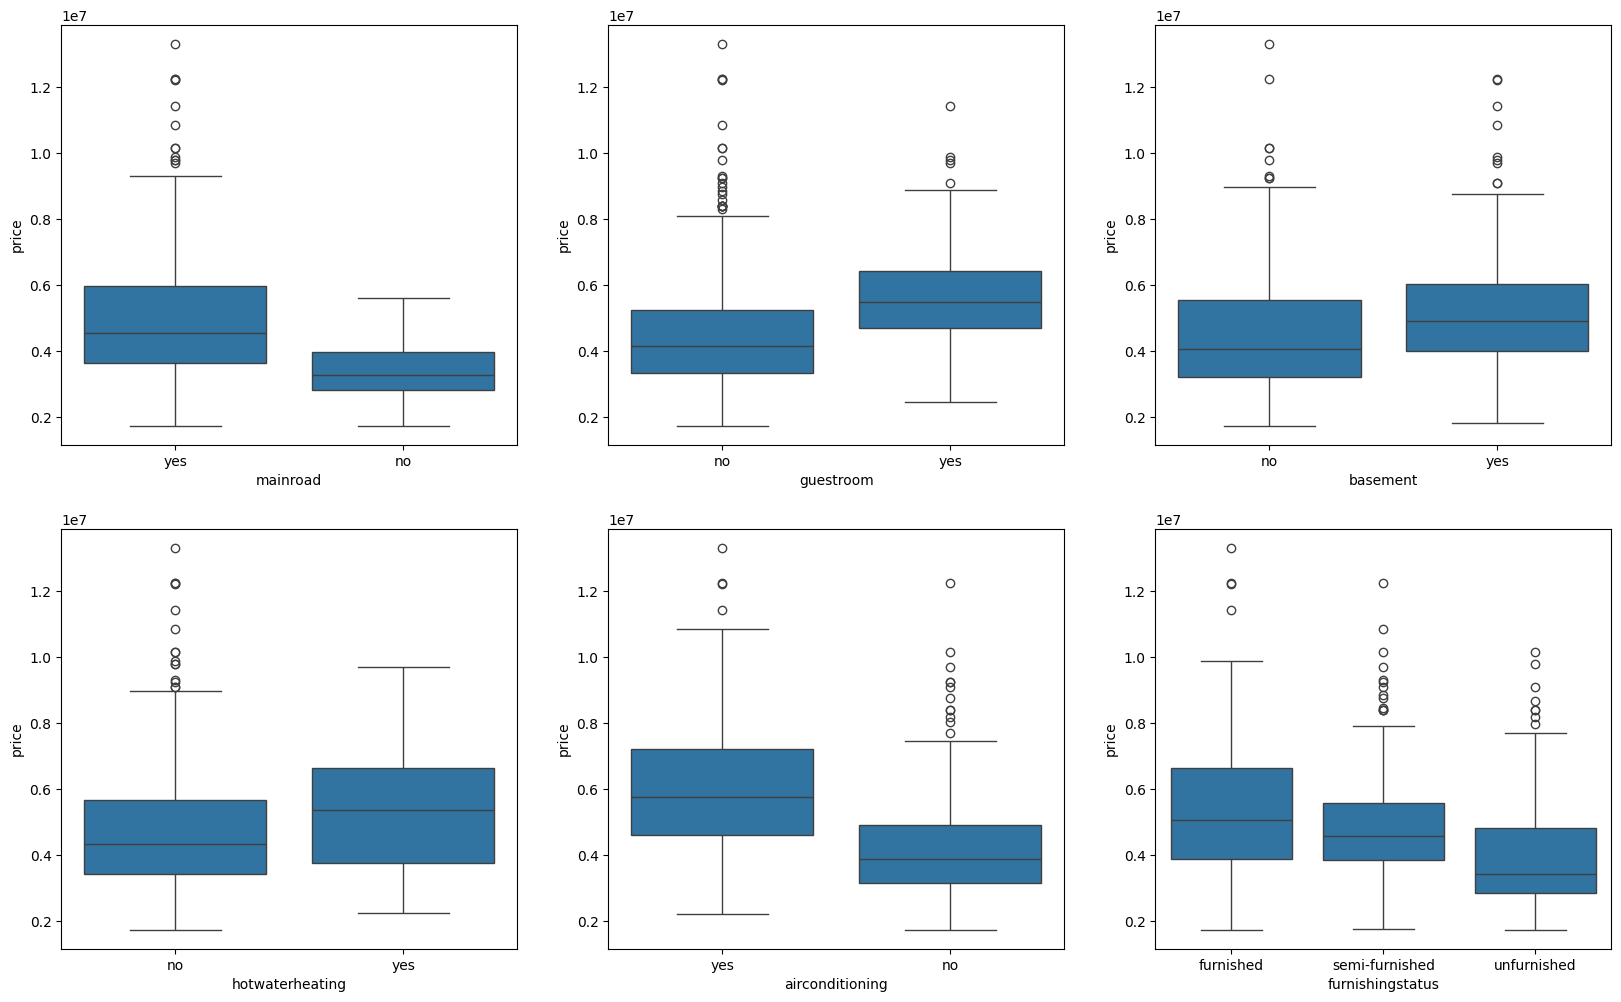

In [ ]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'mainroad', y = 'price', data = df)
plt.subplot(2,3,2)
sns.boxplot(x = 'guestroom', y = 'price', data = df)
plt.subplot(2,3,3)
sns.boxplot(x = 'basement', y = 'price', data = df)
plt.subplot(2,3,4)
sns.boxplot(x = 'hotwaterheating', y = 'price', data = df)
plt.subplot(2,3,5)
sns.boxplot(x = 'airconditioning', y = 'price', data = df)
plt.subplot(2,3,6)
sns.boxplot(x = 'furnishingstatus', y = 'price', data = df)
plt.show()

<Axes: xlabel='prefarea', ylabel='count'>

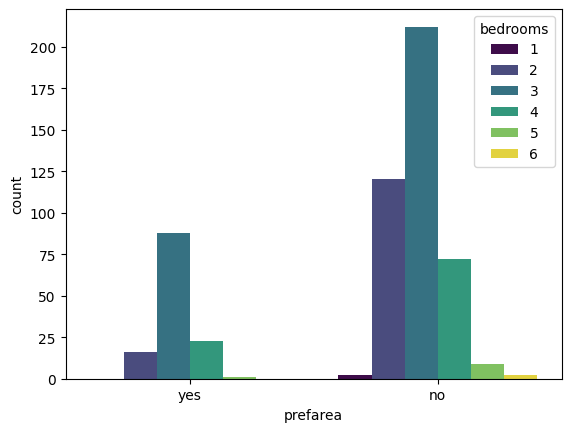

In [ ]:
sns.countplot(data=df, x='prefarea', hue='bedrooms', palette='viridis')

<Axes: xlabel='prefarea', ylabel='area'>

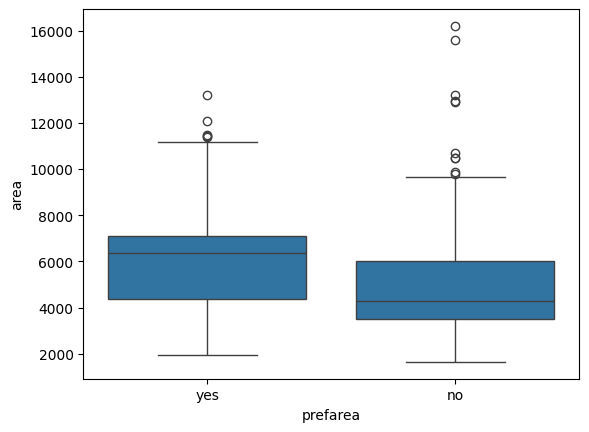

In [ ]:
sns.boxplot(x='prefarea', y='area', data=df)

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
mapping ={'yes':1, 'no':0}
col=['mainroad','guestroom', 'basement', 'hotwaterheating', 'airconditioning']
for col in df:
    df[col]=[mapping.get(value, value) for value in df[col]]

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [ ]:
df['furnishingstatus'].unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

In [ ]:
mapping ={'unfurnished':0, 'semi-furnished':1, 'furnished':2}
col=['furnishingstatus']
for col in df:
    df[col]=[mapping.get(value, value) for value in df[col]]
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2


<Axes: >

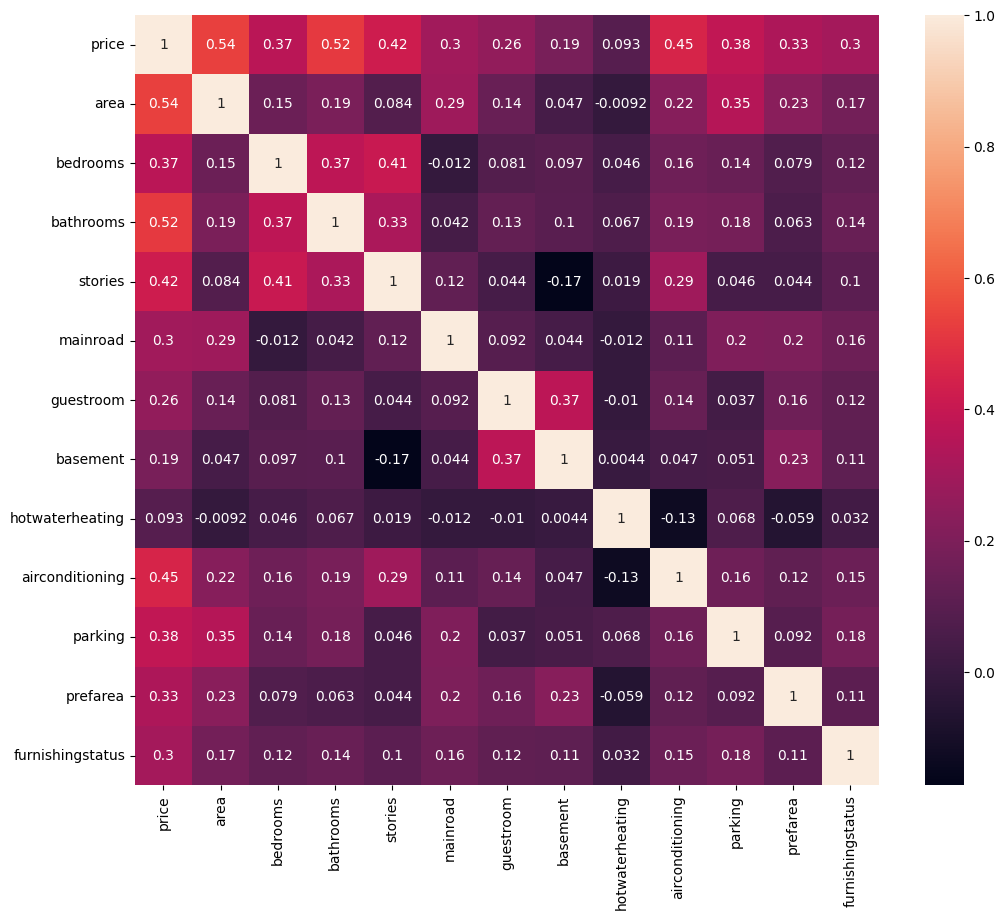

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
x_1=df.iloc[:,1:]
x_1


,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,2
1,8960,4,4,4,1,0,0,0,1,3,0,2
2,9960,3,2,2,1,0,1,0,0,2,1,1
3,7500,4,2,2,1,0,1,0,1,3,1,2
4,7420,4,1,2,1,1,1,0,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2,0,0
541,2400,3,1,1,0,0,0,0,0,0,0,1
542,3620,2,1,1,1,0,0,0,0,0,0,0
543,2910,3,1,1,0,0,0,0,0,0,0,2


In [ ]:
y_1=df.iloc[:,0]
y_1

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

In [ ]:
x_1=MinMaxScaler().fit_transform(x_1)
pd.DataFrame(x_1)

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.396564,0.6,0.333333,0.666667,1.0,0.0,0.0,0.0,1.0,0.666667,1.0,1.0
1,0.502405,0.6,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,1.000000,0.0,1.0
2,0.571134,0.4,0.333333,0.333333,1.0,0.0,1.0,0.0,0.0,0.666667,1.0,0.5
3,0.402062,0.6,0.333333,0.333333,1.0,0.0,1.0,0.0,1.0,1.000000,1.0,1.0
4,0.396564,0.6,0.000000,0.333333,1.0,1.0,1.0,0.0,1.0,0.666667,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,0.092784,0.2,0.000000,0.000000,1.0,0.0,1.0,0.0,0.0,0.666667,0.0,0.0
541,0.051546,0.4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.5
542,0.135395,0.2,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
543,0.086598,0.4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(x_1,y_1)

ExtraTreesClassifier()

In [ ]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [ ]:
col=['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus']
feature_imp=pd.Series(model.feature_importances_, index=col)
feature_imp

area                0.392784
bedrooms            0.106775
bathrooms           0.049613
stories             0.093875
mainroad            0.019793
guestroom           0.026316
basement            0.038364
hotwaterheating     0.018909
airconditioning     0.032152
parking             0.107313
prefarea            0.032296
furnishingstatus    0.081809
dtype: float64

<Axes: >

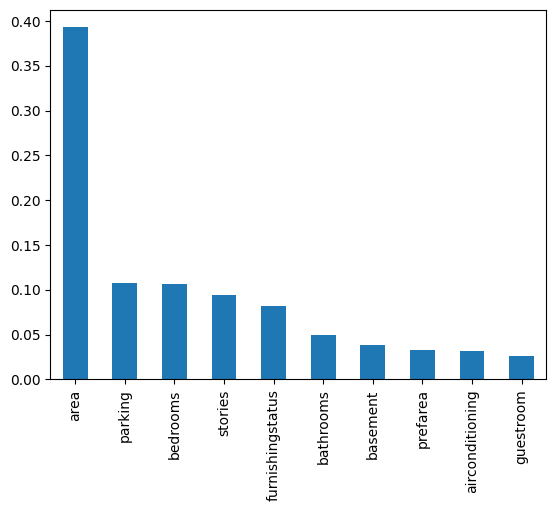

In [ ]:
feature_imp.nlargest(10).plot(kind='bar')

In [ ]:
from sklearn.model_selection import train_test_split
df1=df.copy()
df1=df1.drop(columns={'hotwaterheating', 'guestroom', 'basement'}, axis=1)
df1.head()

,price,area,bedrooms,bathrooms,stories,mainroad,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,1,2,1,2
1,12250000,8960,4,4,4,1,1,3,0,2
2,12250000,9960,3,2,2,1,0,2,1,1
3,12215000,7500,4,2,2,1,1,3,1,2
4,11410000,7420,4,1,2,1,1,2,0,2


In [ ]:
x=df1.iloc[:,1:]
x

,area,bedrooms,bathrooms,stories,mainroad,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,1,2,1,2
1,8960,4,4,4,1,1,3,0,2
2,9960,3,2,2,1,0,2,1,1
3,7500,4,2,2,1,1,3,1,2
4,7420,4,1,2,1,1,2,0,2
...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,2,0,0
541,2400,3,1,1,0,0,0,0,1
542,3620,2,1,1,1,0,0,0,0
543,2910,3,1,1,0,0,0,0,2


In [ ]:
y=df1.iloc[:,0]
y

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

In [ ]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.20, random_state=42)
x_train.shape

(436, 9)

In [ ]:
x_test.shape

(109, 9)

In [ ]:
y_train.shape

(436,)

In [ ]:
y_test.shape

(109,)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()


In [ ]:
y_train=np.array(y_train).reshape(-1,1)
y_test=np.array(y_test).reshape(-1,1)

In [ ]:
scaled_x_train=scaler.fit_transform(x_train)
scaled_y_train=scaler.fit_transform(y_train)

In [ ]:
scaled_x_test=scaler.fit_transform(x_test)
scaled_y_test=scaler.fit_transform(y_test)

In [ ]:
from sklearn.linear_model import LinearRegression
lr_model=LinearRegression()
lr_model.fit(scaled_x_train, scaled_y_train)

LinearRegression()

In [ ]:
coef=lr_model.coef_
coef

array([[0.29511926, 0.05152402, 0.31501712, 0.16553205, 0.0759088 ,
        0.21071399, 0.10989584, 0.17555822, 0.11106182]])

In [ ]:
lr_model.intercept_

array([-2.18594436e-16])

In [ ]:
predictions=lr_model.predict(scaled_x_test)
predictions=predictions.reshape(-1)
predictions

array([ 1.22872570e-02,  1.44042915e+00, -8.92522853e-01, -5.24008688e-02,
       -6.90352829e-01, -5.68537365e-01,  6.63230801e-01,  6.68061431e-01,
       -1.24529914e+00, -1.09406129e+00,  2.64761299e+00, -1.04786409e+00,
       -8.57174433e-01, -9.91424634e-01, -7.84386282e-01,  2.25010775e-02,
       -1.00504958e+00,  7.71143840e-02, -3.86894053e-01, -6.07295407e-01,
        5.91207855e-01,  4.40766766e-01, -1.08933849e+00, -2.73290069e-01,
        1.65750504e-01,  1.42531822e+00, -1.17068652e+00, -1.07356638e-01,
        1.94055535e+00, -7.19609703e-01,  7.52360311e-01, -7.84175139e-01,
        9.55738442e-01, -2.59559080e-01, -5.93343008e-01,  5.51652945e-01,
       -2.98282805e-01, -3.83274312e-01, -8.18203955e-01, -6.44570064e-02,
        2.55224911e-03, -6.49923646e-01,  1.42878722e+00, -3.47177647e-01,
       -4.98152252e-01, -1.97859839e-01,  1.00016542e+00, -3.49166383e-01,
       -4.48886457e-01, -9.35970264e-01,  1.32271139e+00, -1.05987698e+00,
       -8.58951675e-02, -

In [ ]:
scaled_y_test=scaled_y_test.reshape(-1)
residuals=scaled_y_test-predictions
residuals

array([-0.43374489, -0.70987308,  0.3153877 ,  0.68955043, -0.2915439 ,
        0.5207058 , -0.55538484, -0.87468407,  0.10772488,  0.35813506,
       -0.36028163,  0.00369635,  0.12436175,  0.25861195, -0.43102674,
       -1.06666882, -0.03911816,  0.96479675, -0.53273167, -0.34346582,
        0.17048373, -0.25508204, -0.29731981,  0.38113603, -0.52805067,
        1.7960783 ,  0.31333182,  0.15293159,  0.19109847, -0.38682905,
        0.04046678,  0.11363346, -0.22518237, -0.66006664, -0.15503743,
       -0.91083956,  0.25045124, -0.38067388,  0.14766228, -1.10425276,
        0.21426798,  0.05722074, -0.69823114,  0.30245963, -0.32806695,
       -0.03678476, -0.30074485,  0.67496089, -0.44271731, -0.48182354,
        0.18623232, -0.07769727, -0.24215595, -0.09929832, -0.03034361,
       -0.3854281 ,  0.7719498 , -0.2803925 , -0.08724132,  0.19444188,
       -0.28336069,  0.06287272, -0.38385133, -0.40097826, -0.2811435 ,
        1.09550232, -0.37712431,  0.97111972, -0.8780968 ,  0.06

Text(0.5, 0, 'Predictions')

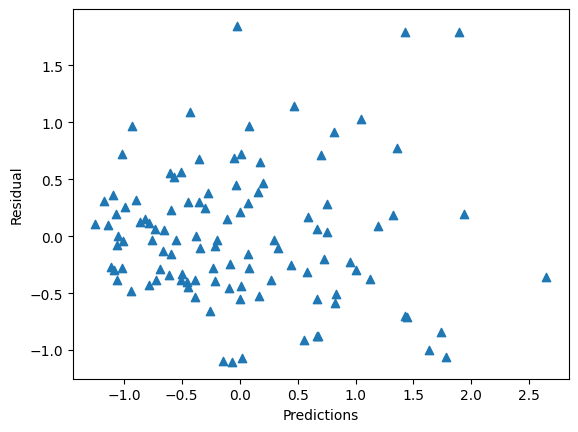

In [ ]:
plt.scatter(predictions, residuals, marker='^')
plt.ylabel('Residual')
plt.xlabel('Predictions')

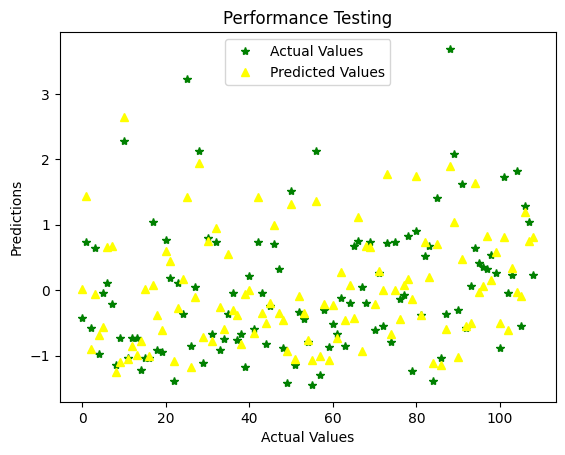

In [ ]:
plt.plot(scaled_y_test, '*', label='Actual Values',color='Green')
plt.plot(predictions,'^', label='Predicted Values', color='yellow')
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.title('Performance Testing')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(scaled_y_test, predictions)

0.3477617353116631